# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [339]:
#Import Library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import VarianceThreshold

import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
#Data Loading
data = pd.read_csv('dataset_inisiasi.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Memahami Struktur Data

In [341]:
#Meninjau jumlah baris dan kolom
data_size = data.shape
print("Ukuran data : ", data_size)

 #Jenis data di setiap kolom
data.info()

Ukuran data :  (2512, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14

### Dataset Information
*   Dataset ini memiliki 2512 baris dan 16 kolom
*   Terdapat beberapa jenis data, di antaranya object, float64, dan int64

## Menangani Data yang Hilang

In [342]:
#Pengecekan missing values
missing_values = data.isna().sum()
print(missing_values)
print("Jumlah data hilang : ", missing_values.sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64
Jumlah data hilang :  0


### Insight
*   Tidak ada data hilang sehingga tidak diperlukan data cleaning



## Analisis Distribusi dan Korelasi

In [343]:
#Membagi jenis data Kategorikal dan Numerikal
numerical_col = data.select_dtypes(include=['int64', 'float64'])
categorical_col = data.select_dtypes(include=['object'])

print("Variabel Numerik :", numerical_col.columns.tolist())
print("Variabel Kategorikal:", categorical_col.columns.tolist())

Variabel Numerik : ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Variabel Kategorikal: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


### Drop Irrelevant Column

In [344]:
#Menghapus variabel yang kurang relevan
drop_columns = ['TransactionID', 'AccountID', 'TransactionDate', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate']
data = data.drop(columns=drop_columns, errors='ignore')
data

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40
...,...,...,...,...,...,...,...,...,...
2507,856.21,Credit,Colorado Springs,Branch,33,Doctor,109,1,12690.79
2508,251.54,Debit,Tucson,Branch,48,Doctor,177,1,254.75
2509,28.63,Debit,San Diego,Branch,56,Retired,146,1,3382.91
2510,185.97,Debit,Denver,Online,23,Student,19,1,1776.91


In [345]:
# Data kategorikal setelah penghapusan kolom
categorical_col = data.select_dtypes(include=['object'])
print("Variabel Kategorikal:", categorical_col.columns.tolist())

Variabel Kategorikal: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']


In [346]:
#Analisis deskriptif
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


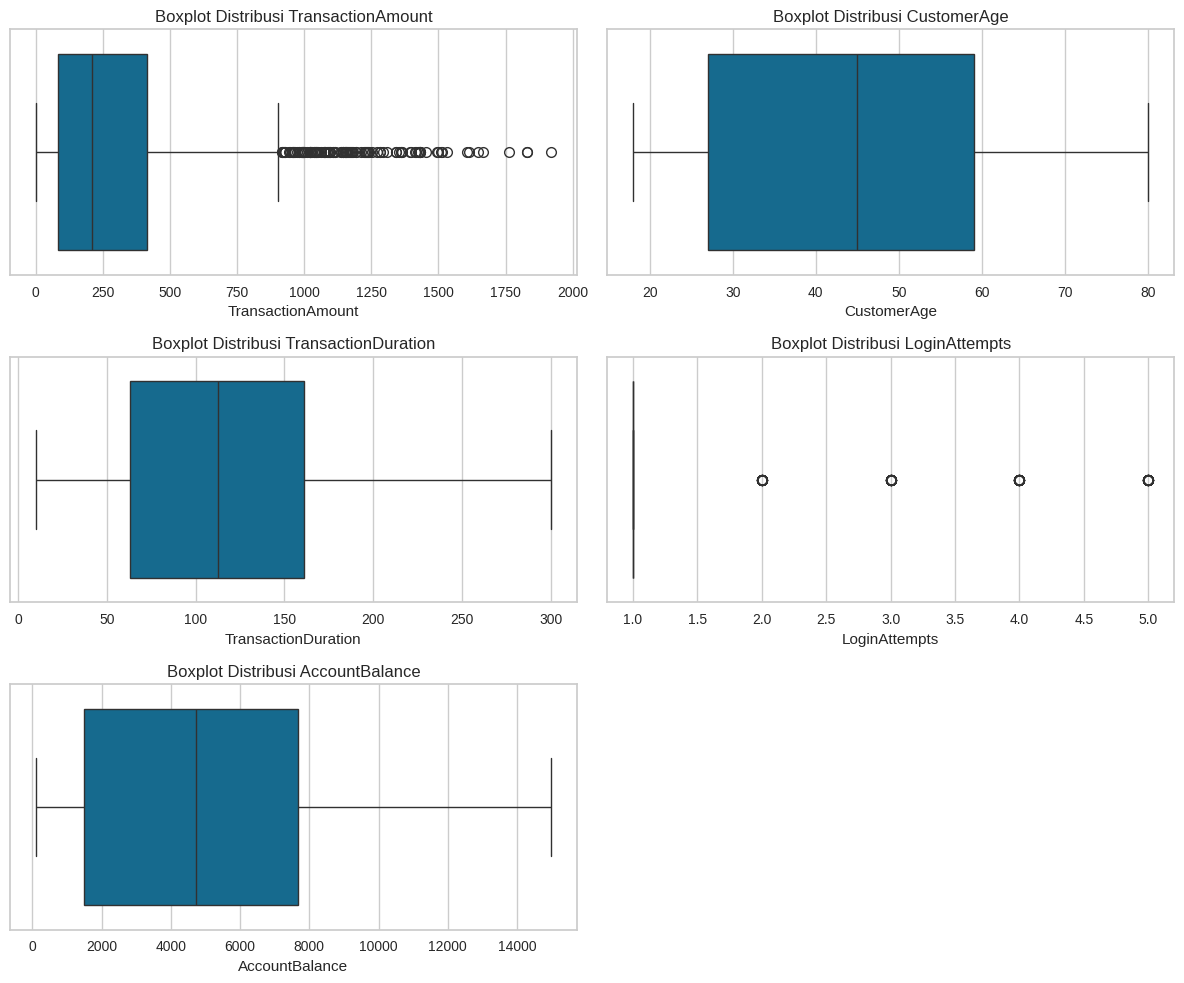

In [347]:
#Visualisasi Boxplot
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_col.columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=numerical_col[col])
    plt.title(f"Boxplot Distribusi {col}")
plt.tight_layout()
plt.show()

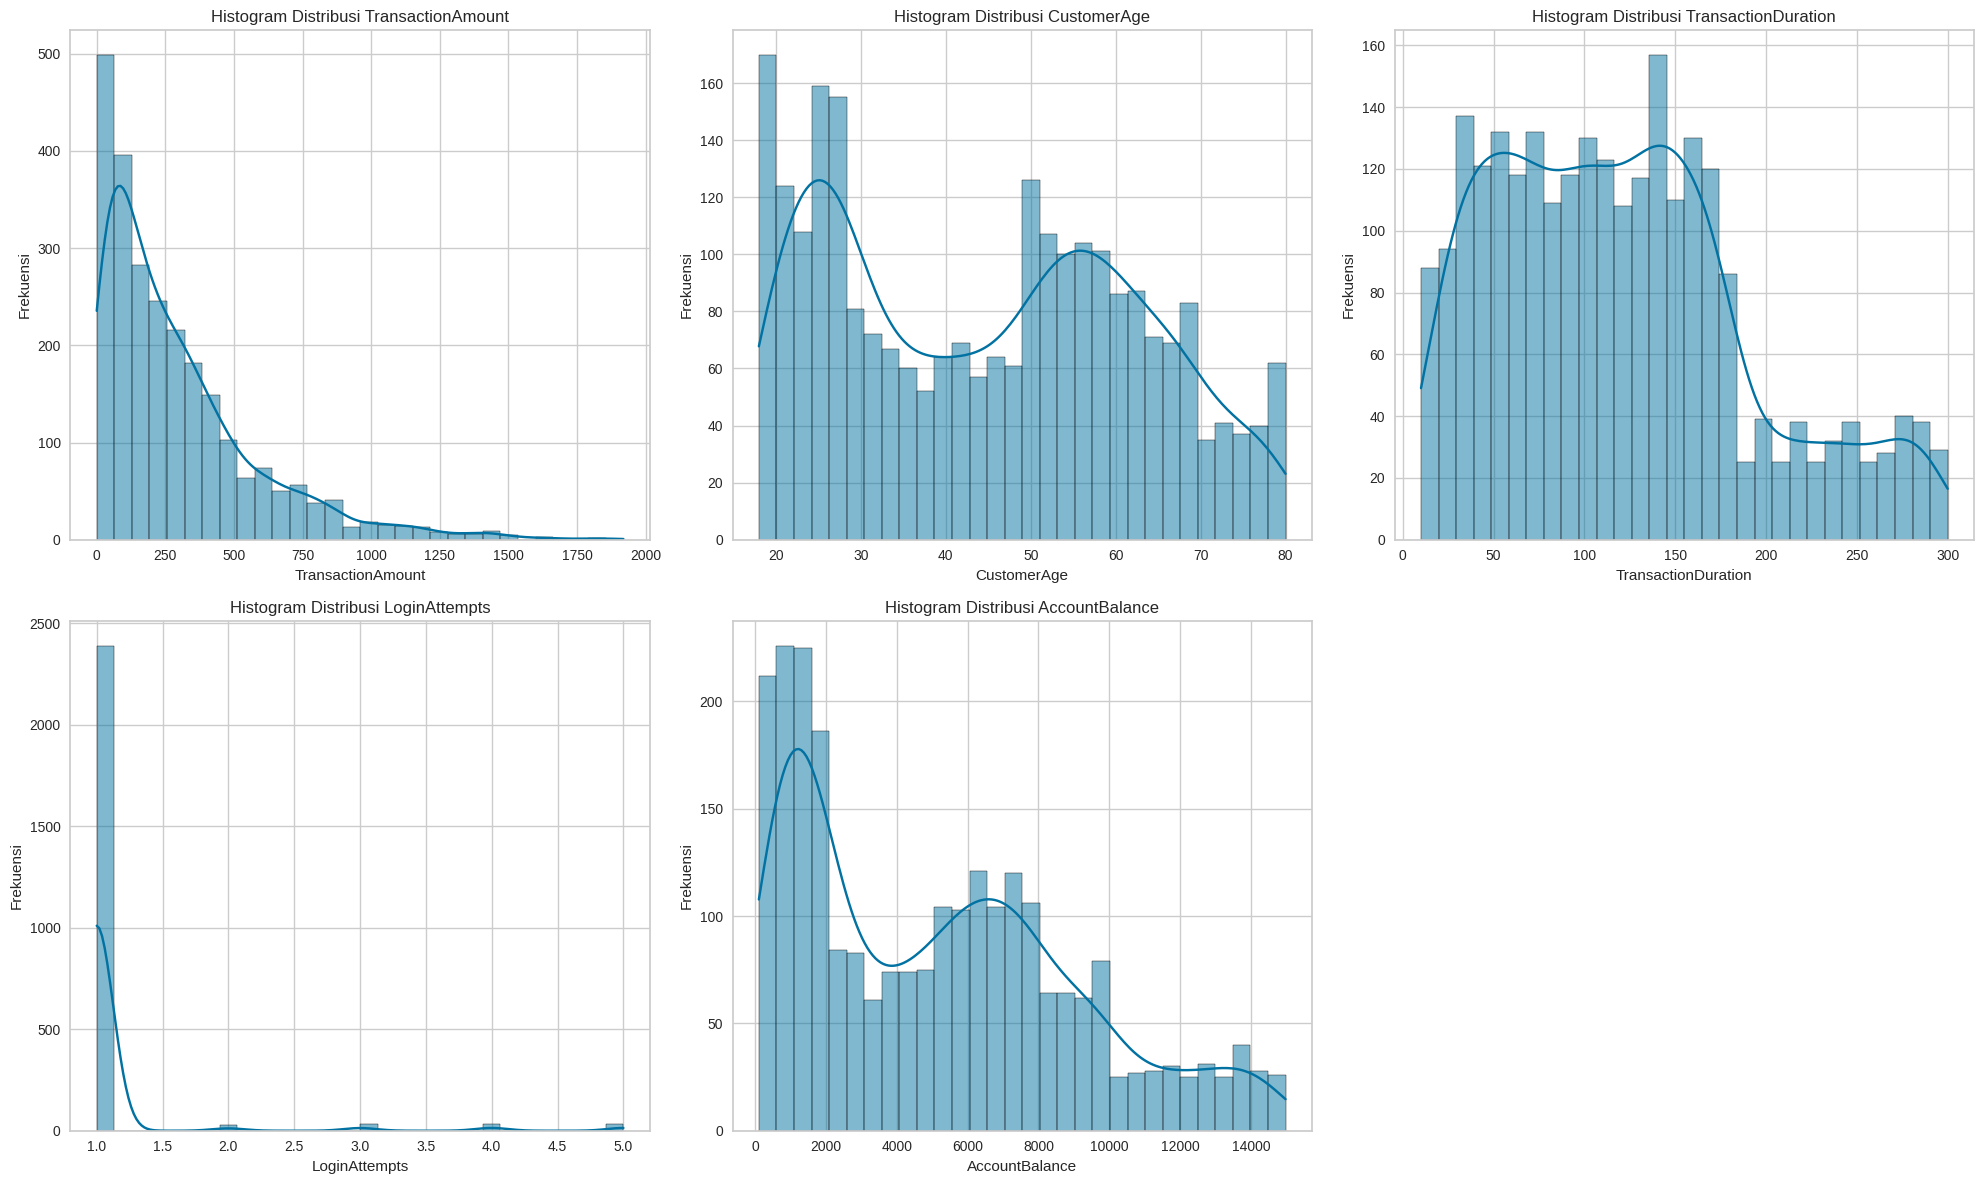

In [348]:
#Visualisasi Histogram
plt.figure(figsize=(20, 12))
for i, col in enumerate(numerical_col.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(numerical_col[col], bins=30, kde=True)  # kde=True adds a density curve
    plt.title(f"Histogram Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

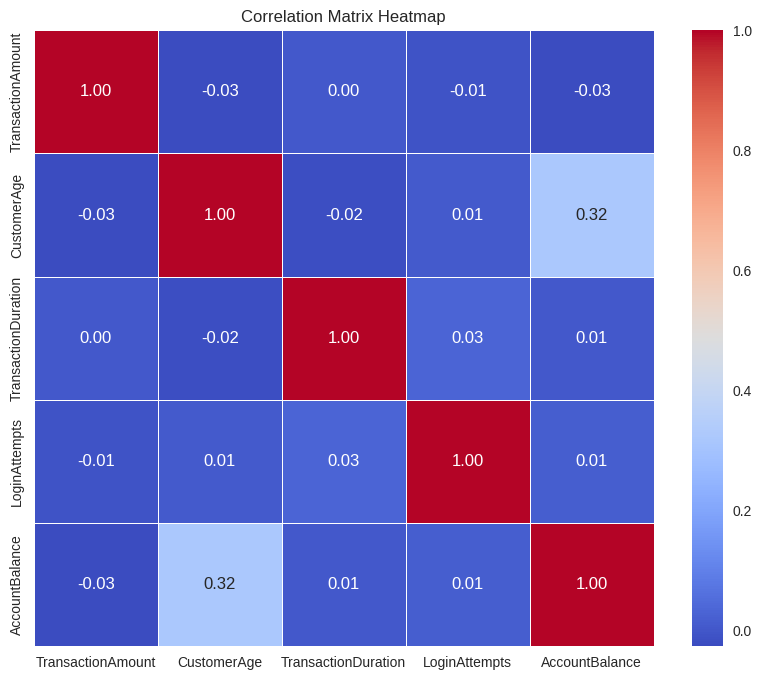

In [349]:
#Menghitung Correlation Matrix
corr_matrix = numerical_col.corr()

# Visualisasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Insight

> Analisis Deskriptif
1.   TransactionAmount
  *   Rata-rata transaksi adalah 297.59, dengan standar deviasi 291.95, menunjukkan variasi yang cukup besar dalam jumlah transaksi.
  * Transaksi terkecil adalah 0.26, sedangkan transaksi terbesar mencapai 1919.11.
  * Kuartil pertama 81.88 dan kuartil ketiga 414.53 menunjukkan bahwa sebagian besar transaksi berkisar dalam rentang ini.
  * 50% dari transaksi berada di bawah 211.14 (median).
  * Nilai maksimum yang jauh lebih besar dari kuartil ketiga menunjukkan adanya outlier atau transaksi dengan nilai yang jauh lebih tinggi dari kebanyakan transaksi lainnya.
2. CustomerAge
  * Rata-rata usia pelanggan adalah 44.67 tahun, dengan standar deviasi 17.79 tahun, menunjukkan penyebaran usia yang cukup lebar.
  * Usia termuda adalah 18 tahun, sedangkan yang tertua adalah 80 tahun
  * Mayoritas pelanggan berusia antara 27 tahun (Q1) dan 59 tahun (Q3).
  * Median usia pelanggan adalah 45 tahun, yang menunjukkan bahwa distribusi usia cukup seimbang.
3. TransactionDuration
  * Rata-rata durasi transaksi adalah 119.64 detik dengan standar deviasi 69.96 detik.
  * Durasi transaksi bervariasi dari 10 detik (tercepat) hingga 300 detik (terlama).
  * Mayoritas transaksi selesai dalam rentang 63 detik (Q1) hingga 161 detik (Q3).
  * Nilai median 112.5 detik menunjukkan bahwa sebagian besar transaksi berlangsung sekitar 2 menit.
4. LoginAttempts
  * Rata-rata jumlah percobaan login adalah 1.12 kali, dengan standar deviasi 0.60.
  * Sebagian besar pelanggan hanya mencoba login 1 kali (nilai Q1 dan median = 1), tetapi ada yang mencoba hingga 5 kali, yang bisa mengindikasikan potensi percobaan login gagal atau aktivitas mencurigakan.
5. AccountBalance
  * Rata-rata saldo akun adalah 5114.30, dengan standar deviasi 3900.94, menunjukkan perbedaan saldo yang cukup besar antar pelanggan.
  * Saldo terkecil adalah 101.25, sementara saldo terbesar mencapai 14,977.99
  * Kuartil pertama 1504.37 dan kuartil ketiga 7678.82 menunjukkan bahwa sebagian besar saldo akun berkisar dalam rentang ini.
  * Median saldo akun adalah 4735.51, menunjukkan bahwa sebagian besar pelanggan memiliki saldo sekitar jumlah ini.
  * Nilai maksimum yang tinggi dibanding Q3 menunjukkan adanya beberapa pelanggan dengan saldo sangat besar, yang bisa menjadi outlier atau pelanggan dengan akun premium.

> Lainnya
  * Terdapat data outlier pada variabel TransactionAmmount dan LoginAttempts
  * Variabel CustomerAge dan AccountBalance memiliki korelasi yang cukup kuat

## Visualisasi Data

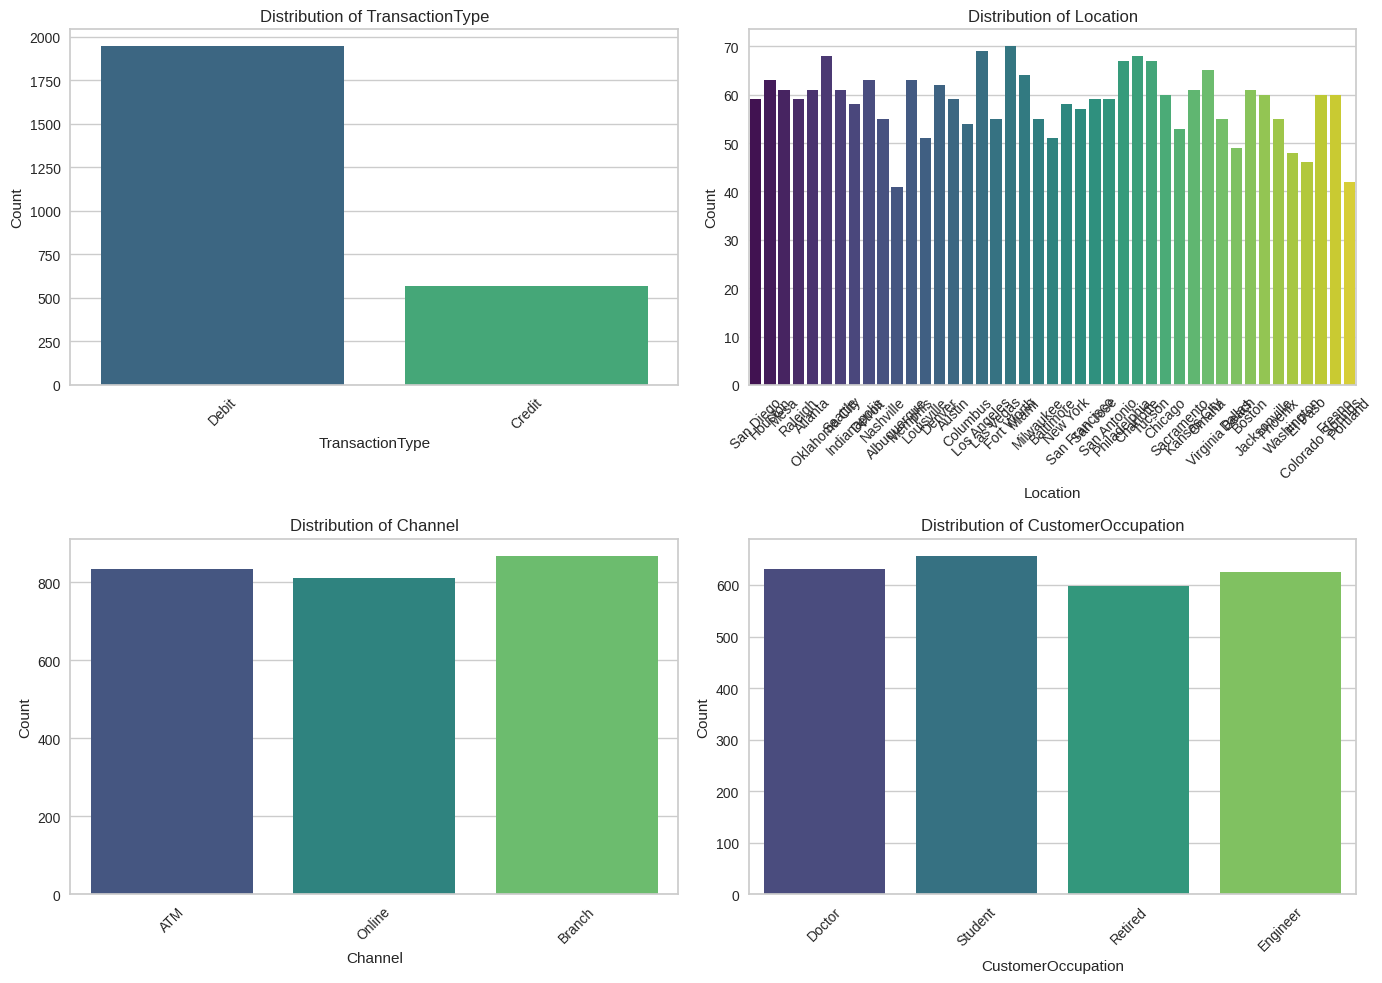

In [350]:
#Visualisasi Diagram Batang Variabel Kategorikal
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_col.columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=data[col], palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### Menangani missing Values

In [351]:
#Pengecekan missing values
print("Jumlah missing values:", missing_values.sum())

Jumlah missing values: 0


### Menangani data duplikat

In [352]:
#Pengecekan data duplikat
duplicated = data.duplicated().sum()
print("Jumlah duplikasi data:", duplicated)

Jumlah duplikasi data: 0


### Pemecahan jenis data

In [353]:
#Pembagian jenis data setelah menghapus variabel yang kurang relevan
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
categorical_columns = data.select_dtypes(include=['object'])

print("Variabel Numerik :", numerical_columns.columns.tolist())
print("Variabel Kategorikal:", categorical_columns.columns.tolist())

Variabel Numerik : ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Variabel Kategorikal: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']


### Pengelompokan Data (Binning)

In [354]:
#Pengecekan range CustomerAge
min_age = min(data['CustomerAge'])
max_age = max(data['CustomerAge'])

print("Termuda: ", min_age)
print("Tertua: ", max_age)

Termuda:  18
Tertua:  80


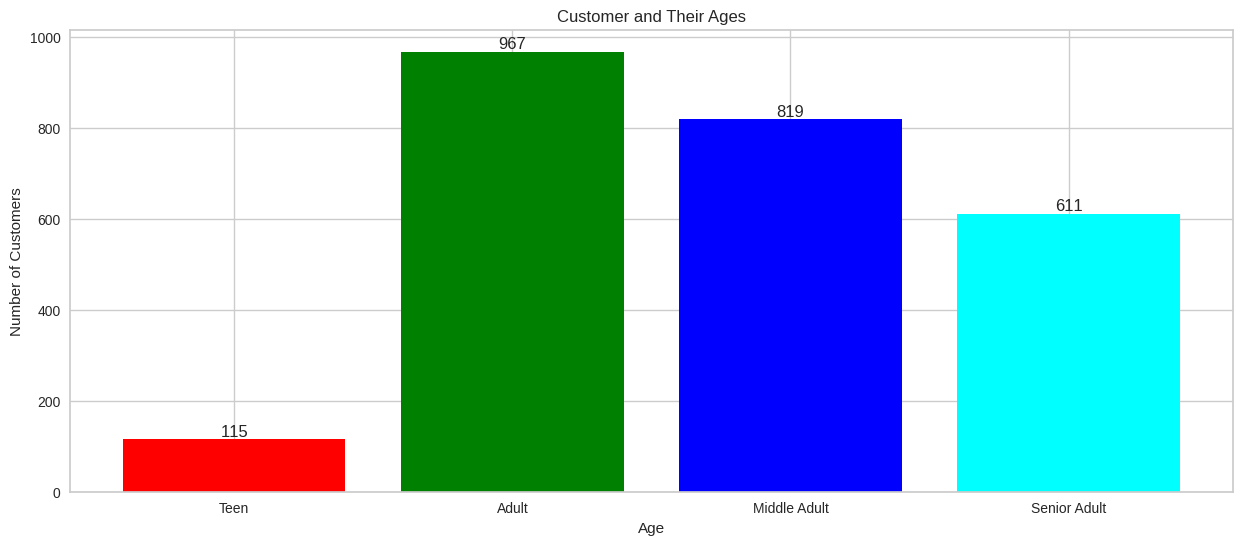

In [355]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
teen = data.CustomerAge[(data.CustomerAge >= 13) & (data.CustomerAge <= 19)]
adult = data.CustomerAge[(data.CustomerAge >= 20) & (data.CustomerAge <= 39)]
mid_adult = data.CustomerAge[(data.CustomerAge >= 40) & (data.CustomerAge <= 59)]
senior_adult = data.CustomerAge[data.CustomerAge >= 60]

# Menyusun data untuk plotting
x = ["Teen", "Adult", "Middle Adult", "Senior Adult"]
y = [len(teen.values), len(adult.values), len(mid_adult.values), len(senior_adult.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

### Encoding Data Kategorikal

In [356]:
# Buat instance LabelEncoder
label_encoders = {}

# Encode kolom kategorikal
for column in categorical_columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    label_encoders[column] = label_encoder

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
data.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70,0,81,1,5112.21
1,376.24,1,15,0,68,0,141,1,13758.91
2,126.29,1,23,2,19,3,56,1,1122.35
3,184.50,1,33,2,26,3,25,1,8569.06
4,13.45,0,1,2,26,3,198,1,7429.40


In [357]:
label_encoders

{'TransactionType': LabelEncoder(),
 'Location': LabelEncoder(),
 'Channel': LabelEncoder(),
 'CustomerOccupation': LabelEncoder()}

### Normalisasi/Standarisasi variabel numerik

In [358]:
#Inisialisasi Scaler
scaler = MinMaxScaler()

numeric_cols = numerical_columns.columns

# Normalisasi kolom numerik
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print("After Scaling:\n", data[numeric_cols])

After Scaling:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              0.007207     0.838710             0.244828            0.0   
1              0.195940     0.806452             0.451724            0.0   
2              0.065680     0.016129             0.158621            0.0   
3              0.096016     0.129032             0.051724            0.0   
4              0.006874     0.129032             0.648276            0.0   
...                 ...          ...                  ...            ...   
2507           0.446074     0.241935             0.341379            0.0   
2508           0.130953     0.483871             0.575862            0.0   
2509           0.014785     0.612903             0.468966            0.0   
2510           0.096782     0.080645             0.031034            0.0   
2511           0.126545     0.096774             0.286207            0.0   

      AccountBalance  
0           0.336832  
1           0.918055  
2 

### Deteksi dan Penanganan Outlier

In [359]:
# Melihat outlier dengan IQR (Interquartile Range)
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = ((data[numeric_cols] < lower_bound) | (data[numeric_cols] > upper_bound)).sum()
print(outliers)

TransactionAmount      113
CustomerAge              0
TransactionDuration      0
LoginAttempts          122
AccountBalance           0
dtype: int64


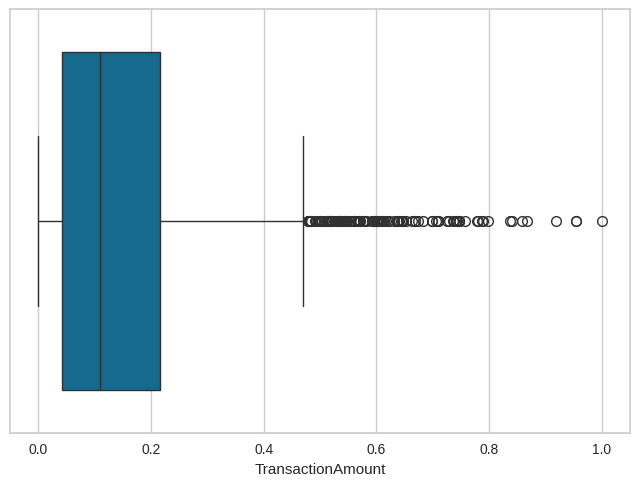

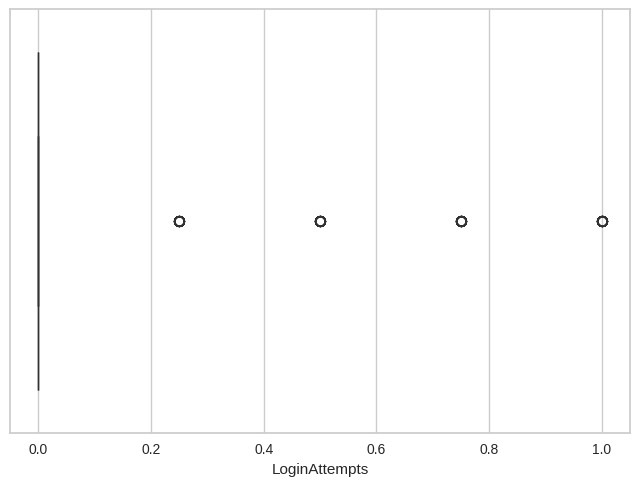

In [360]:
# Visualisasi Data Outlier
sns.boxplot(x=data['TransactionAmount'])
plt.show()

sns.boxplot(x=data['LoginAttempts'])
plt.show()

In [361]:
# Hapus outlier
condition = ~((data[numeric_cols] < lower_bound) | (data[numeric_cols] > upper_bound)).any(axis=1)
data_cleaned = data.loc[condition, numeric_cols]

# Menggabungkan kembali dengan kolom kategorikal
categorical_cols = categorical_columns.columns
data = pd.concat([data_cleaned, data.loc[condition, categorical_cols]], axis=1)

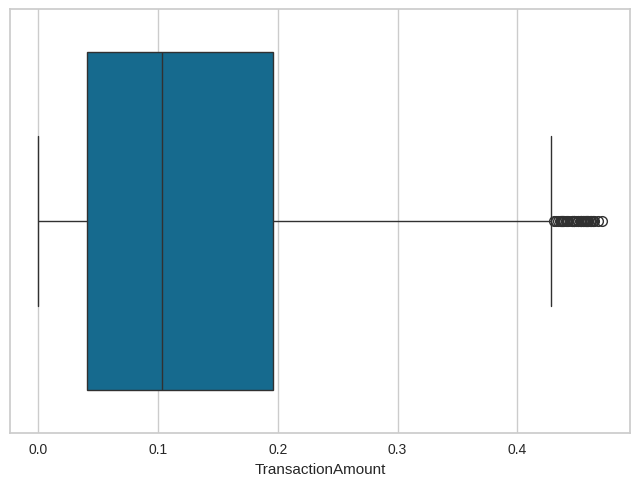

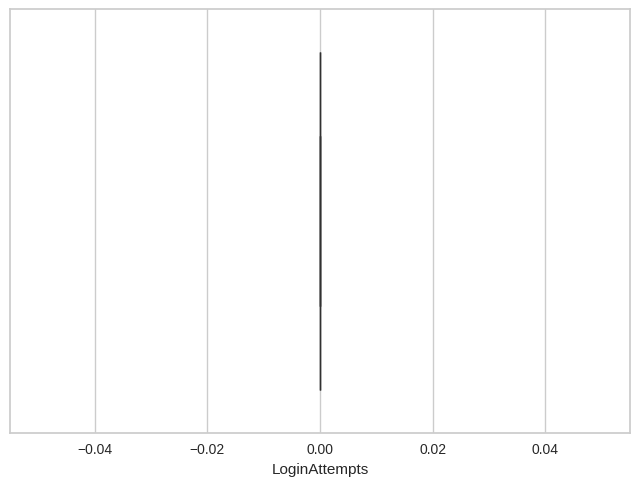

In [362]:
# Visualisasi data setelah penanganan outlier
sns.boxplot(x=data['TransactionAmount'])
plt.show()

sns.boxplot(x=data['LoginAttempts'])
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### Memilih Algoritma

In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2282 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2282 non-null   float64
 1   CustomerAge          2282 non-null   float64
 2   TransactionDuration  2282 non-null   float64
 3   LoginAttempts        2282 non-null   float64
 4   AccountBalance       2282 non-null   float64
 5   TransactionType      2282 non-null   int64  
 6   Location             2282 non-null   int64  
 7   Channel              2282 non-null   int64  
 8   CustomerOccupation   2282 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 178.3 KB


In [364]:
# Pemilihan fitur numerik
features = ['CustomerOccupation', 'CustomerAge']
X = data[features]

### Melatih Fitur

In [365]:
# Melatih algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['K-Means Cluster'] = kmeans.fit_predict(X)

data

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,K-Means Cluster
0,0.007207,0.838710,0.244828,0.0,0.336832,1,36,0,0,1
1,0.195940,0.806452,0.451724,0.0,0.918055,1,15,0,0,1
2,0.065680,0.016129,0.158621,0.0,0.068637,1,23,2,3,2
3,0.096016,0.129032,0.051724,0.0,0.569198,1,33,2,3,2
4,0.006874,0.129032,0.648276,0.0,0.492591,0,1,2,3,2
...,...,...,...,...,...,...,...,...,...,...
2507,0.446074,0.241935,0.341379,0.0,0.846257,0,7,1,0,1
2508,0.130953,0.483871,0.575862,0.0,0.010318,1,40,1,0,1
2509,0.014785,0.612903,0.468966,0.0,0.220590,1,36,1,2,0
2510,0.096782,0.080645,0.031034,0.0,0.112636,1,10,2,3,2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### Elbow Method

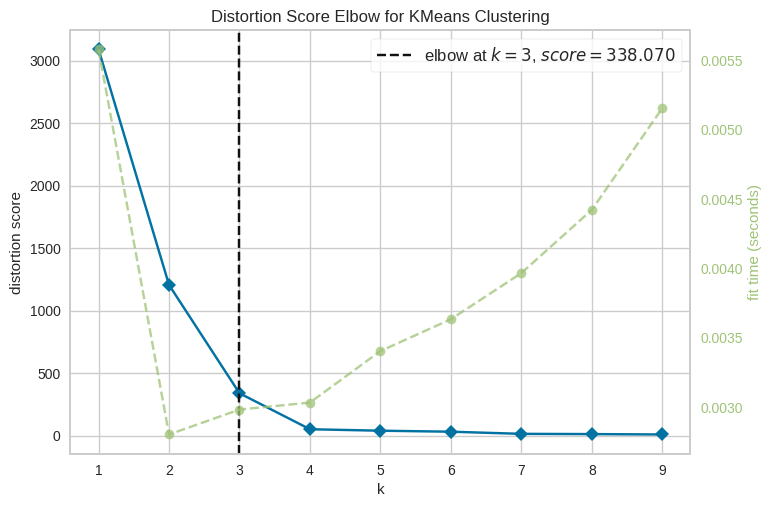

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [366]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

### Silhouette Score

In [367]:
# Inisialisasi dan melatih model KMeans dan DBSCAN
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

# Mendapatkan label cluster
kmeans_labels = kmeans.labels_

# Evaluasi menggunakan Silhouette Score
kmeans_score = silhouette_score(X, kmeans_labels)
print(f'Silhouette Score K-Means: {kmeans_score}')

Silhouette Score K-Means: 0.8506438717338242


In [368]:
# Hyperparameter Tuning dengan jumlah cluster optimal
kmeans_optimized = KMeans(n_clusters=4, random_state=42, n_init=10, max_iter=300, tol=1e-4)

# Fit model dan prediksi klaster
data['Cluster_KMeans_Optimized'] = kmeans_optimized.fit_predict(X)

# Evaluasi ulang dengan Silhouette Score
sil_score_optimized = silhouette_score(X, data['Cluster_KMeans_Optimized'])

print(f"Silhouette Score (Optimized K-Means): {sil_score_optimized:.4f}")

Silhouette Score (Optimized K-Means): 0.8506


In [369]:
data

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,K-Means Cluster,Cluster_KMeans_Optimized
0,0.007207,0.838710,0.244828,0.0,0.336832,1,36,0,0,1,1
1,0.195940,0.806452,0.451724,0.0,0.918055,1,15,0,0,1,1
2,0.065680,0.016129,0.158621,0.0,0.068637,1,23,2,3,2,2
3,0.096016,0.129032,0.051724,0.0,0.569198,1,33,2,3,2,2
4,0.006874,0.129032,0.648276,0.0,0.492591,0,1,2,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...
2507,0.446074,0.241935,0.341379,0.0,0.846257,0,7,1,0,1,1
2508,0.130953,0.483871,0.575862,0.0,0.010318,1,40,1,0,1,1
2509,0.014785,0.612903,0.468966,0.0,0.220590,1,36,1,2,0,0
2510,0.096782,0.080645,0.031034,0.0,0.112636,1,10,2,3,2,2


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [370]:
from sklearn.feature_selection import VarianceThreshold

# Menerapkan Variance Threshold (hapus fitur dengan variansi di bawah threshold)
selector = VarianceThreshold(threshold=0.3)  # Sesuaikan threshold dengan data
X_selected = selector.fit_transform(X)

# Menampilkan fitur yang dipertahankan
selected_features = X.columns[selector.get_support()]
print("Fitur yang dipertahankan:", selected_features)

Fitur yang dipertahankan: Index(['CustomerOccupation'], dtype='object')


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

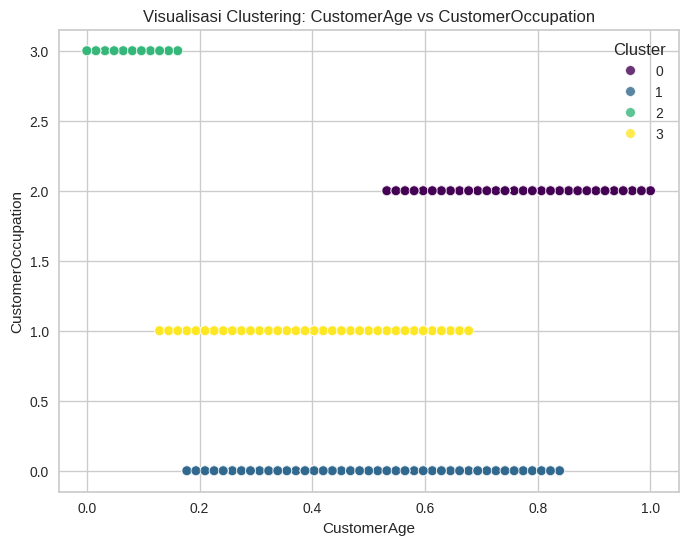

In [371]:
# Pilih dua fitur numerik untuk visualisasi
x_feature = 'CustomerAge'
y_feature = 'CustomerOccupation'

# Scatter plot dengan fitur yang dipilih
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data[x_feature],
    y=data[y_feature],
    hue=data['Cluster_KMeans_Optimized'],
    palette='viridis',
    s=50, alpha=0.8
)
plt.title(f'Visualisasi Clustering: {x_feature} vs {y_feature}')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [372]:
data['Cluster'] = kmeans.labels_
data.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,K-Means Cluster,Cluster_KMeans_Optimized,Cluster
0,0.007207,0.838710,0.244828,0.0,0.336832,1,36,0,0,1,1,3
1,0.195940,0.806452,0.451724,0.0,0.918055,1,15,0,0,1,1,3
2,0.065680,0.016129,0.158621,0.0,0.068637,1,23,2,3,2,2,2
3,0.096016,0.129032,0.051724,0.0,0.569198,1,33,2,3,2,2,2
4,0.006874,0.129032,0.648276,0.0,0.492591,0,1,2,3,2,2,2


In [373]:
for col, label_encoder in label_encoders.items():
    data[col] = label_encoder.inverse_transform(data[col].astype(int))

In [374]:
data.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,K-Means Cluster,Cluster_KMeans_Optimized,Cluster
0,0.007207,0.838710,0.244828,0.0,0.336832,Debit,San Diego,ATM,Doctor,1,1,3
1,0.195940,0.806452,0.451724,0.0,0.918055,Debit,Houston,ATM,Doctor,1,1,3
2,0.065680,0.016129,0.158621,0.0,0.068637,Debit,Mesa,Online,Student,2,2,2
3,0.096016,0.129032,0.051724,0.0,0.569198,Debit,Raleigh,Online,Student,2,2,2
4,0.006874,0.129032,0.648276,0.0,0.492591,Credit,Atlanta,Online,Student,2,2,2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [375]:
data[numeric_cols]

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,0.838710,0.244828,0.0,0.336832
1,0.195940,0.806452,0.451724,0.0,0.918055
2,0.065680,0.016129,0.158621,0.0,0.068637
3,0.096016,0.129032,0.051724,0.0,0.569198
4,0.006874,0.129032,0.648276,0.0,0.492591
...,...,...,...,...,...
2507,0.446074,0.241935,0.341379,0.0,0.846257
2508,0.130953,0.483871,0.575862,0.0,0.010318
2509,0.014785,0.612903,0.468966,0.0,0.220590
2510,0.096782,0.080645,0.031034,0.0,0.112636


In [376]:
data[numeric_cols] = scaler.inverse_transform(data[numeric_cols])
data.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,K-Means Cluster,Cluster_KMeans_Optimized,Cluster
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,1,1,3
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,1,1,3
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,2,2,2
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,2,2,2
4,13.45,26.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,2,2,2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [377]:
# Definisikan metode agregasi untuk fitur numerik dan kategorikal
agg_methods = {col: ['min', 'max', 'mean'] for col in data[numeric_cols] if col != 'Cluster_KMeans_Optimized'}
agg_methods.update({col: lambda x: x.mode()[0] if not x.mode().empty else None for col in data[categorical_cols]})

# Agregasi berdasarkan cluster
summary = data.groupby('Cluster_KMeans_Optimized').agg(agg_methods)

# Format hasil agar lebih rapi
def format_summary(summary):
    for cluster, data in summary.iterrows():
        print(f"\nKlaster {cluster}:")
        for col in data.index:
            if isinstance(data[col], tuple):  # Fitur numerik
                print(f"  - {col}: min {data[col][0]}, max {data[col][1]}, mean {data[col][2]:.2f}")
            else:  # Fitur kategorikal
                print(f"  - {col}: kategori terbanyak adalah {data[col]}")

# Cetak hasil per klaster
format_summary(summary)


Klaster 0:
  - ('TransactionAmount', 'min'): kategori terbanyak adalah 1.2100000000000002
  - ('TransactionAmount', 'max'): kategori terbanyak adalah 888.57
  - ('TransactionAmount', 'mean'): kategori terbanyak adalah 254.30436928702008
  - ('CustomerAge', 'min'): kategori terbanyak adalah 51.0
  - ('CustomerAge', 'max'): kategori terbanyak adalah 80.0
  - ('CustomerAge', 'mean'): kategori terbanyak adalah 65.25228519195612
  - ('TransactionDuration', 'min'): kategori terbanyak adalah 12.0
  - ('TransactionDuration', 'max'): kategori terbanyak adalah 293.0
  - ('TransactionDuration', 'mean'): kategori terbanyak adalah 116.6599634369287
  - ('LoginAttempts', 'min'): kategori terbanyak adalah 1.0
  - ('LoginAttempts', 'max'): kategori terbanyak adalah 1.0
  - ('LoginAttempts', 'mean'): kategori terbanyak adalah 1.0
  - ('AccountBalance', 'min'): kategori terbanyak adalah 1006.12
  - ('AccountBalance', 'max'): kategori terbanyak adalah 7996.699999999999
  - ('AccountBalance', 'mean'): ka

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- Rata-rata Transaction Amount: 254.30
- Rata-rata Customer Age: 65.25
- Rata-rata Transaction Duration: 116.66 detik
- Rata-rata Account Balance: 4,584.06
- Karakteristik Dominan:
  - Mayoritas transaksi dilakukan melalui ATM.
  - Transaksi didominasi oleh pelanggan yang sudah pensiun (Retired).
  - Lokasi transaksi terbanyak berada di Chicago.
  - Jenis transaksi paling umum adalah Debit.
- **Analisis:** Cluster ini terdiri dari pelanggan yang lebih tua (rata-rata usia 65 tahun) dengan saldo akun yang cukup tinggi. Mereka cenderung melakukan transaksi dalam jumlah yang relatif kecil melalui ATM. Karena sebagian besar pelanggan dalam cluster ini adalah pensiunan, mereka mungkin lebih cenderung melakukan transaksi dengan pola yang lebih stabil dan tidak terlalu sering melakukan transaksi dalam jumlah besar.

## Cluster 1:
- Rata-rata Transaction Amount: 248.12
- Rata-rata Customer Age: 49.40
- Rata-rata Transaction Duration: 118.38 detik
- Rata-rata Account Balance: 8,971.08
- Karakteristik Dominan:
  - Mayoritas transaksi dilakukan di cabang bank (Branch).
  - Pelanggan dalam cluster ini kebanyakan berprofesi sebagai dokter.
  - Lokasi transaksi terbanyak berada di San Diego.
  - Jenis transaksi paling umum adalah Debit.
- **Analisis:** Pelanggan dalam cluster ini cenderung memiliki saldo akun yang tinggi, dengan rata-rata hampir 9.000. Sebagai profesional (dokter), mereka lebih sering melakukan transaksi di cabang bank dibandingkan ATM, mungkin karena mereka lebih memilih layanan yang lebih personal atau transaksi yang lebih kompleks. Dengan usia rata-rata sekitar 49 tahun, mereka berada dalam kelompok usia pekerja produktif dengan daya beli yang relatif tinggi.

## Cluster 2:
- Rata-rata Transaction Amount: 268.41
- Rata-rata Customer Age: 23.18
- Rata-rata Transaction Duration: 121.91 detik
- Rata-rata Account Balance: 1,581.97
- Karakteristik Dominan:
  - Mayoritas transaksi dilakukan di cabang bank (Branch).
  - Pelanggan dalam cluster ini mayoritas mahasiswa (Student).
  - Lokasi transaksi terbanyak berada di Los Angeles.
  - Jenis transaksi paling umum adalah Debit.
- **Analisis:** Cluster ini terdiri dari pelanggan yang lebih muda dengan rata-rata usia 23 tahun dan saldo akun yang lebih rendah dibandingkan cluster lainnya. Sebagai mahasiswa, mereka cenderung melakukan transaksi dalam jumlah sedang dan lebih sering menggunakan layanan di cabang bank. Saldo akun yang lebih rendah menunjukkan bahwa mereka memiliki daya beli yang lebih terbatas dibandingkan cluster lainnya, tetapi masih cukup aktif dalam melakukan transaksi.

## Cluster 3:
- Rata-rata Transaction Amount: 250.58
- Rata-rata Customer Age: 42.75
- Rata-rata Transaction Duration: 118.71 detik
- Rata-rata Account Balance: 5,494.47
- Karakteristik Dominan:
  - Mayoritas transaksi dilakukan di cabang bank (Branch).
  - Pelanggan dalam cluster ini mayoritas berprofesi sebagai insinyur (Engineer).
  - Lokasi transaksi terbanyak berada di Houston.
  - Jenis transaksi paling umum adalah Debit.
- **Analisis:** Cluster ini mencakup pelanggan dengan usia produktif (rata-rata 42 tahun) dan saldo akun yang cukup besar. Sebagai insinyur, mereka memiliki pendapatan stabil dan cukup aktif dalam melakukan transaksi. Sebagian besar transaksi mereka dilakukan di cabang bank, yang bisa menunjukkan bahwa mereka lebih nyaman dengan transaksi langsung dibandingkan transaksi digital atau melalui ATM.

## Kesimpulan:
- Cluster 0 → Pelanggan lansia, pensiunan, lebih sering menggunakan ATM.
- Cluster 1 → Profesional (dokter) dengan saldo tinggi, lebih banyak transaksi di cabang bank.
- Cluster 2 → Mahasiswa dengan saldo rendah, transaksi aktif di cabang bank.
- Cluster 3 → Pekerja profesional (insinyur) dengan saldo menengah dan transaksi cukup aktif di cabang bank.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
data.to_csv("dataset_clustering.csv", index=False)
print("Selesai.")

Selesai.
